# IMPORT MODULE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# READ THE DATASET

In [2]:
data = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


*The dataset above allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.*

*Data fields:*

* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm


In [4]:
data.shape

(2200, 8)

In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

*There are no "NaN" values in the data.*

In [8]:
data.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [9]:
data['label'].value_counts()

muskmelon      100
chickpea       100
mango          100
kidneybeans    100
jute           100
blackgram      100
mungbean       100
banana         100
coffee         100
pomegranate    100
pigeonpeas     100
lentil         100
cotton         100
watermelon     100
grapes         100
apple          100
papaya         100
coconut        100
maize          100
orange         100
mothbeans      100
rice           100
Name: label, dtype: int64

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

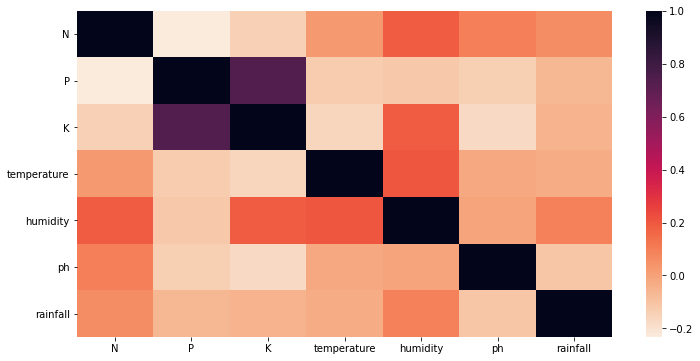

In [10]:
f,ax=plt.subplots(figsize=(12,6))
corr=data.corr()
sns.heatmap(corr , ax=ax ,   cmap="rocket_r")

In [11]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


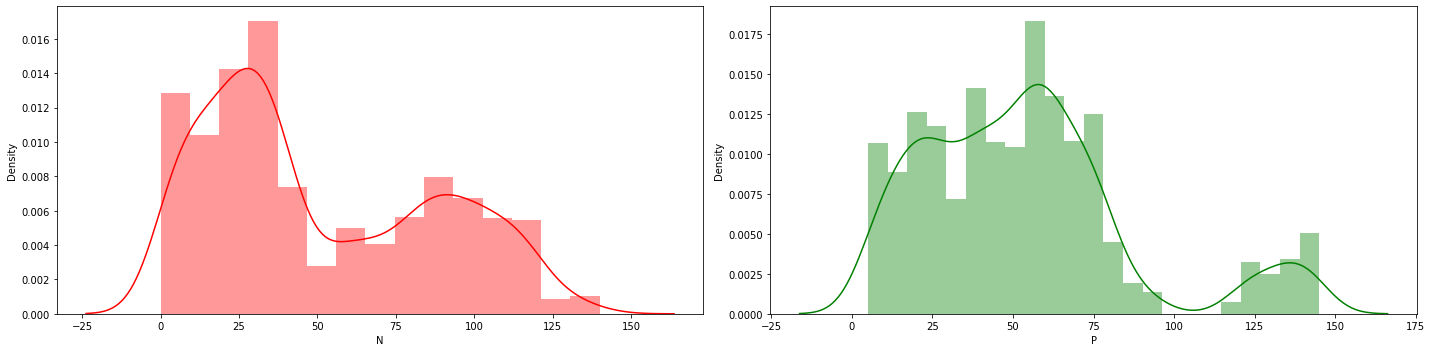

In [12]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['N'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['P'] , color ='green' , ax = ax)
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


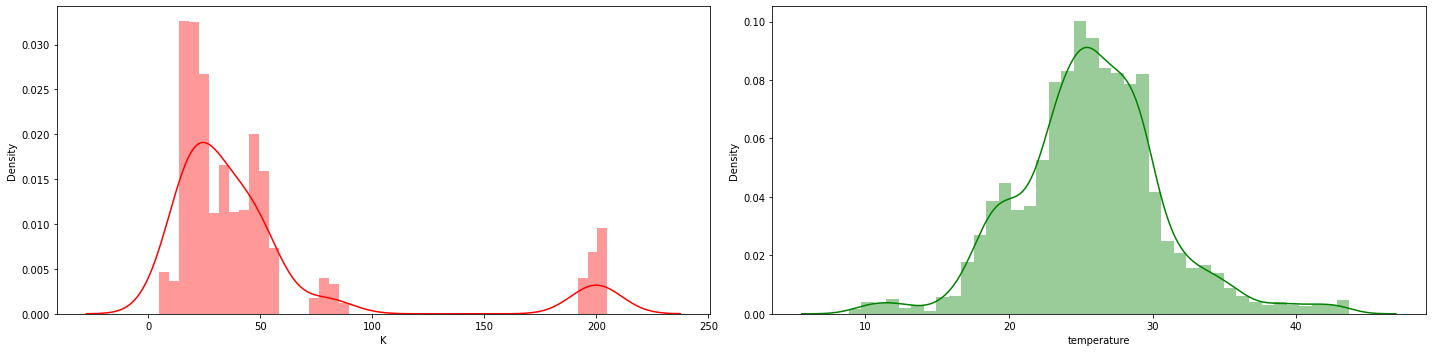

In [13]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['K'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['temperature'] , color ='green' , ax = ax)
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


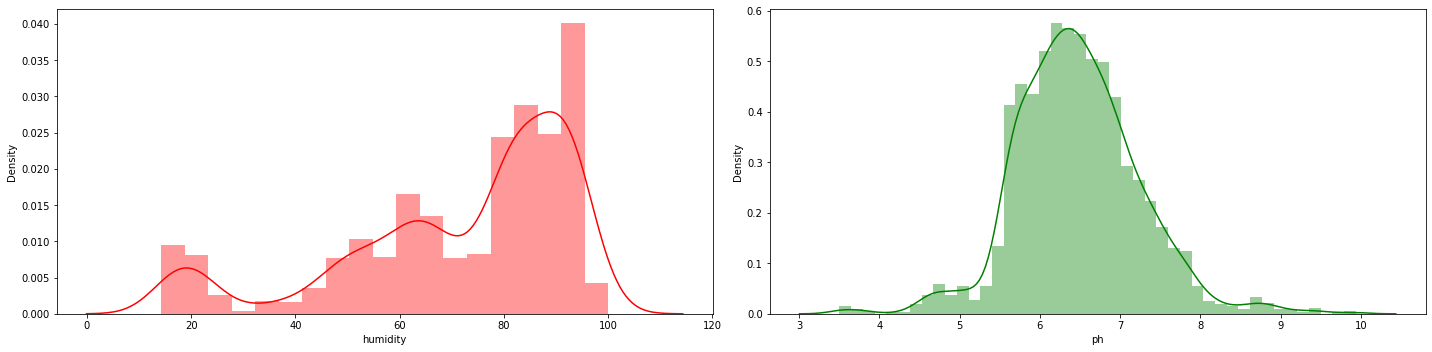

In [14]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['humidity'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['ph'] , color ='green' , ax = ax)
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rainfall', ylabel='Density'>

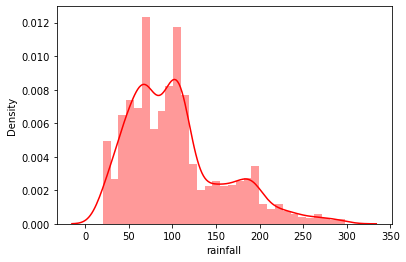

In [15]:
sns.distplot(data['rainfall'],color ='red')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


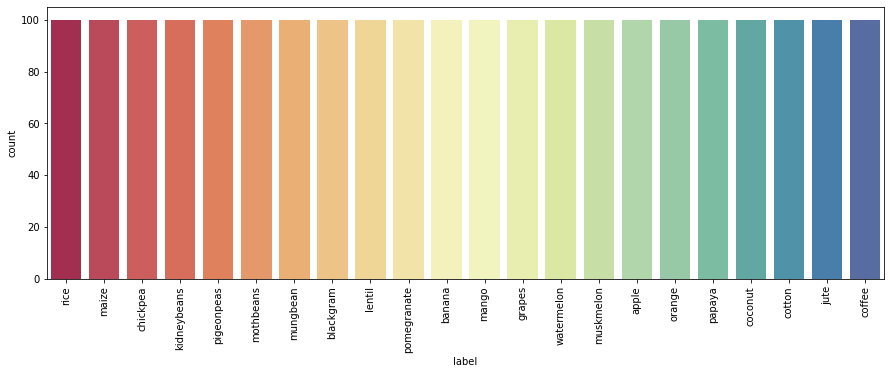

In [16]:
f= plt.figure(figsize=(15,5))
sns.countplot(data['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

# SEPERATING FEATURES AND TARGET LABEL

In [17]:
X = data.drop('label' ,axis =1)

In [18]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
data['label'] = le.fit_transform(data['label'])

In [22]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [23]:
y = data['label']

In [24]:
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int64

# TRAIN TEST SPLIT

In [25]:
model = []
accuracy = []

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DT = DecisionTreeClassifier()

In [30]:
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [31]:
predict = DT.predict(X_test)

In [32]:
DT_accuracy = DT.score(X_test,y_test)

In [33]:
DT_accuracy

0.9886363636363636

In [34]:
accuracy.append(DT_accuracy)

In [35]:
model.append('Decision Tree')

# LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
LG = LogisticRegression()

In [38]:
LG.fit(X_train , y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [39]:
LG_accuracy = LG.score(X_test,y_test)

In [40]:
LG_accuracy

0.9454545454545454

In [41]:
accuracy.append(LG_accuracy)

In [42]:
model.append('Logistic Regression')

# RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RF = RandomForestClassifier()

In [45]:
RF.fit(X_train , y_train)

RandomForestClassifier()

In [46]:
RF_accuracy = RF.score(X_test,y_test)

In [47]:
RF_accuracy

0.9931818181818182

In [48]:
accuracy.append(RF_accuracy)
model.append('Random Forest')

In [49]:
model

['Decision Tree', 'Logistic Regression', 'Random Forest']

In [50]:
accuracy

[0.9886363636363636, 0.9454545454545454, 0.9931818181818182]

<AxesSubplot:>

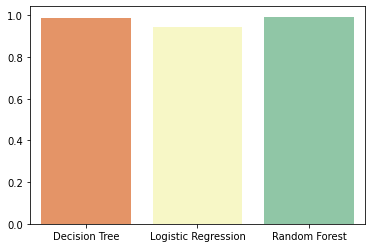

In [51]:
sns.barplot(x = model , y = accuracy ,palette ='Spectral')